datset from https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset

In [ ]:
from google.colab import drive
drive.mount('content/', force_remount = True)

Mounted at content/


In [ ]:
!unzip '/content/content/MyDrive/stanfordDogsSet.zip'
print("done")

Streaming output truncated to the last 5000 lines.
  inflating: images/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1357.jpg  
  inflating: images/Images/n02108089-boxer/n0210

In [ ]:
root_dir = 'images/Images/'
!ls "$root_dir"

n02085620-Chihuahua			  n02100583-vizsla
n02085782-Japanese_spaniel		  n02100735-English_setter
n02085936-Maltese_dog			  n02100877-Irish_setter
n02086079-Pekinese			  n02101006-Gordon_setter
n02086240-Shih-Tzu			  n02101388-Brittany_spaniel
n02086646-Blenheim_spaniel		  n02101556-clumber
n02086910-papillon			  n02102040-English_springer
n02087046-toy_terrier			  n02102177-Welsh_springer_spaniel
n02087394-Rhodesian_ridgeback		  n02102318-cocker_spaniel
n02088094-Afghan_hound			  n02102480-Sussex_spaniel
n02088238-basset			  n02102973-Irish_water_spaniel
n02088364-beagle			  n02104029-kuvasz
n02088466-bloodhound			  n02104365-schipperke
n02088632-bluetick			  n02105056-groenendael
n02089078-black-and-tan_coonhound	  n02105162-malinois
n02089867-Walker_hound			  n02105251-briard
n02089973-English_foxhound		  n02105412-kelpie
n02090379-redbone			  n02105505-komondor
n02090622-borzoi			  n02105641-Old_English_sheepdog
n02090721-Irish_wolfhound		  n02105855-Shetland_sheepdog
n02091032-Itali

In [ ]:
!pip install fastbook --upgrade
import fastai
fastai.__version__
from fastai.vision.all import *

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 188 kB 46.2 MB/s 
     |████████████████████████████████| 1.2 MB 32.6 MB/s 
     |████████████████████████████████| 60 kB 6.4 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
path = Path(root_dir)
path.ls()

(#120) [Path('images/Images/n02091831-Saluki'),Path('images/Images/n02098105-soft-coated_wheaten_terrier'),Path('images/Images/n02098286-West_Highland_white_terrier'),Path('images/Images/n02111129-Leonberg'),Path('images/Images/n02105412-kelpie'),Path('images/Images/n02108915-French_bulldog'),Path('images/Images/n02096177-cairn'),Path('images/Images/n02107683-Bernese_mountain_dog'),Path('images/Images/n02089973-English_foxhound'),Path('images/Images/n02086240-Shih-Tzu')...]

In [ ]:
files = get_image_files(path)
len(files)

20580

In [ ]:
def getName(x):
  x = str(parent_label(x).split("-")[1:]).replace("_", " ")
  y = ''
  for char in x:
    if char not in "[]-',":
        y += char
  return y

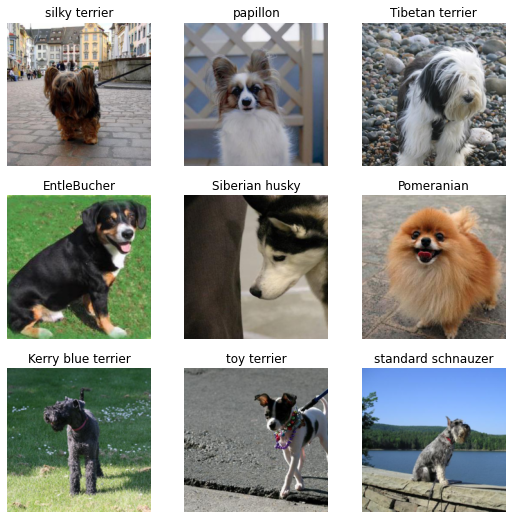

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=lambda x: getName(x),
    item_tfms=Resize(224))

dls = dblock.dataloaders(path)
dls.show_batch()

In [ ]:
x,y = dls.one_batch()
m = x.mean(dim=[0,2,3])
s = x.std(dim=[0,2,3])

In [ ]:
def get_dls(bs, size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=lambda x: getName(x),
                   item_tfms=Resize(460),
                   batch_tfms=[*aug_transforms(size=size, min_scale=0.75),
                               Normalize.from_stats(mean = m, std = s)])
    return dblock.dataloaders(path, bs=bs)

In [ ]:
dls = get_dls(64, 224)
x,y = dls.one_batch()
x.mean(dim=[0,2,3]),x.std(dim=[0,2,3])

(TensorImage([-0.0059, -0.0222,  0.0080], device='cuda:0'),
 TensorImage([1.0004, 0.9938, 1.0228], device='cuda:0'))

In [ ]:
#model = densenet121(pretrained=True)
#model = resnet50(pretrained=True)
#model = alexnet(pretrained=True)
#model = xresnet50(pretrained=True)
model = vgg11_bn(pretrained=True)
#model = vgg19_bn(pretrained=True)

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy, cbs=MixUp())
#learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
#learn = Learner(dls, model, metrics=accuracy)

#dls = get_dls(128, 128)
#learn.fine_tune(2)
#dls = get_dls(64, 224)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,3.910702,3.282447,0.181973,06:51


epoch,train_loss,valid_loss,accuracy,time
0,2.976961,2.185041,0.395287,06:35
1,2.958819,2.078537,0.438533,06:37
2,2.609250,1.541862,0.569242,06:36
3,2.305501,1.194308,0.663265,06:34
4,2.123891,1.089513,0.691934,06:36


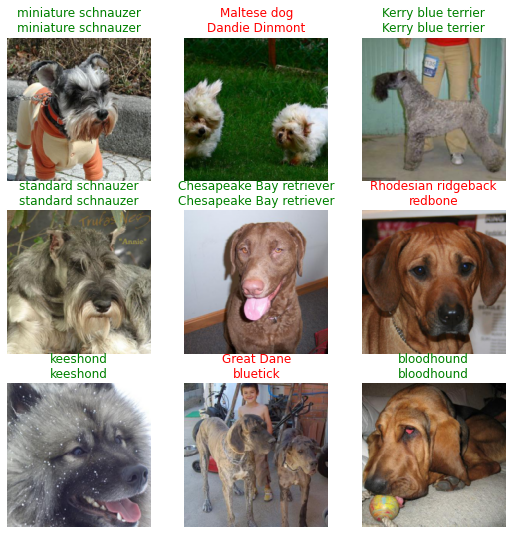

In [ ]:
learn.show_results()

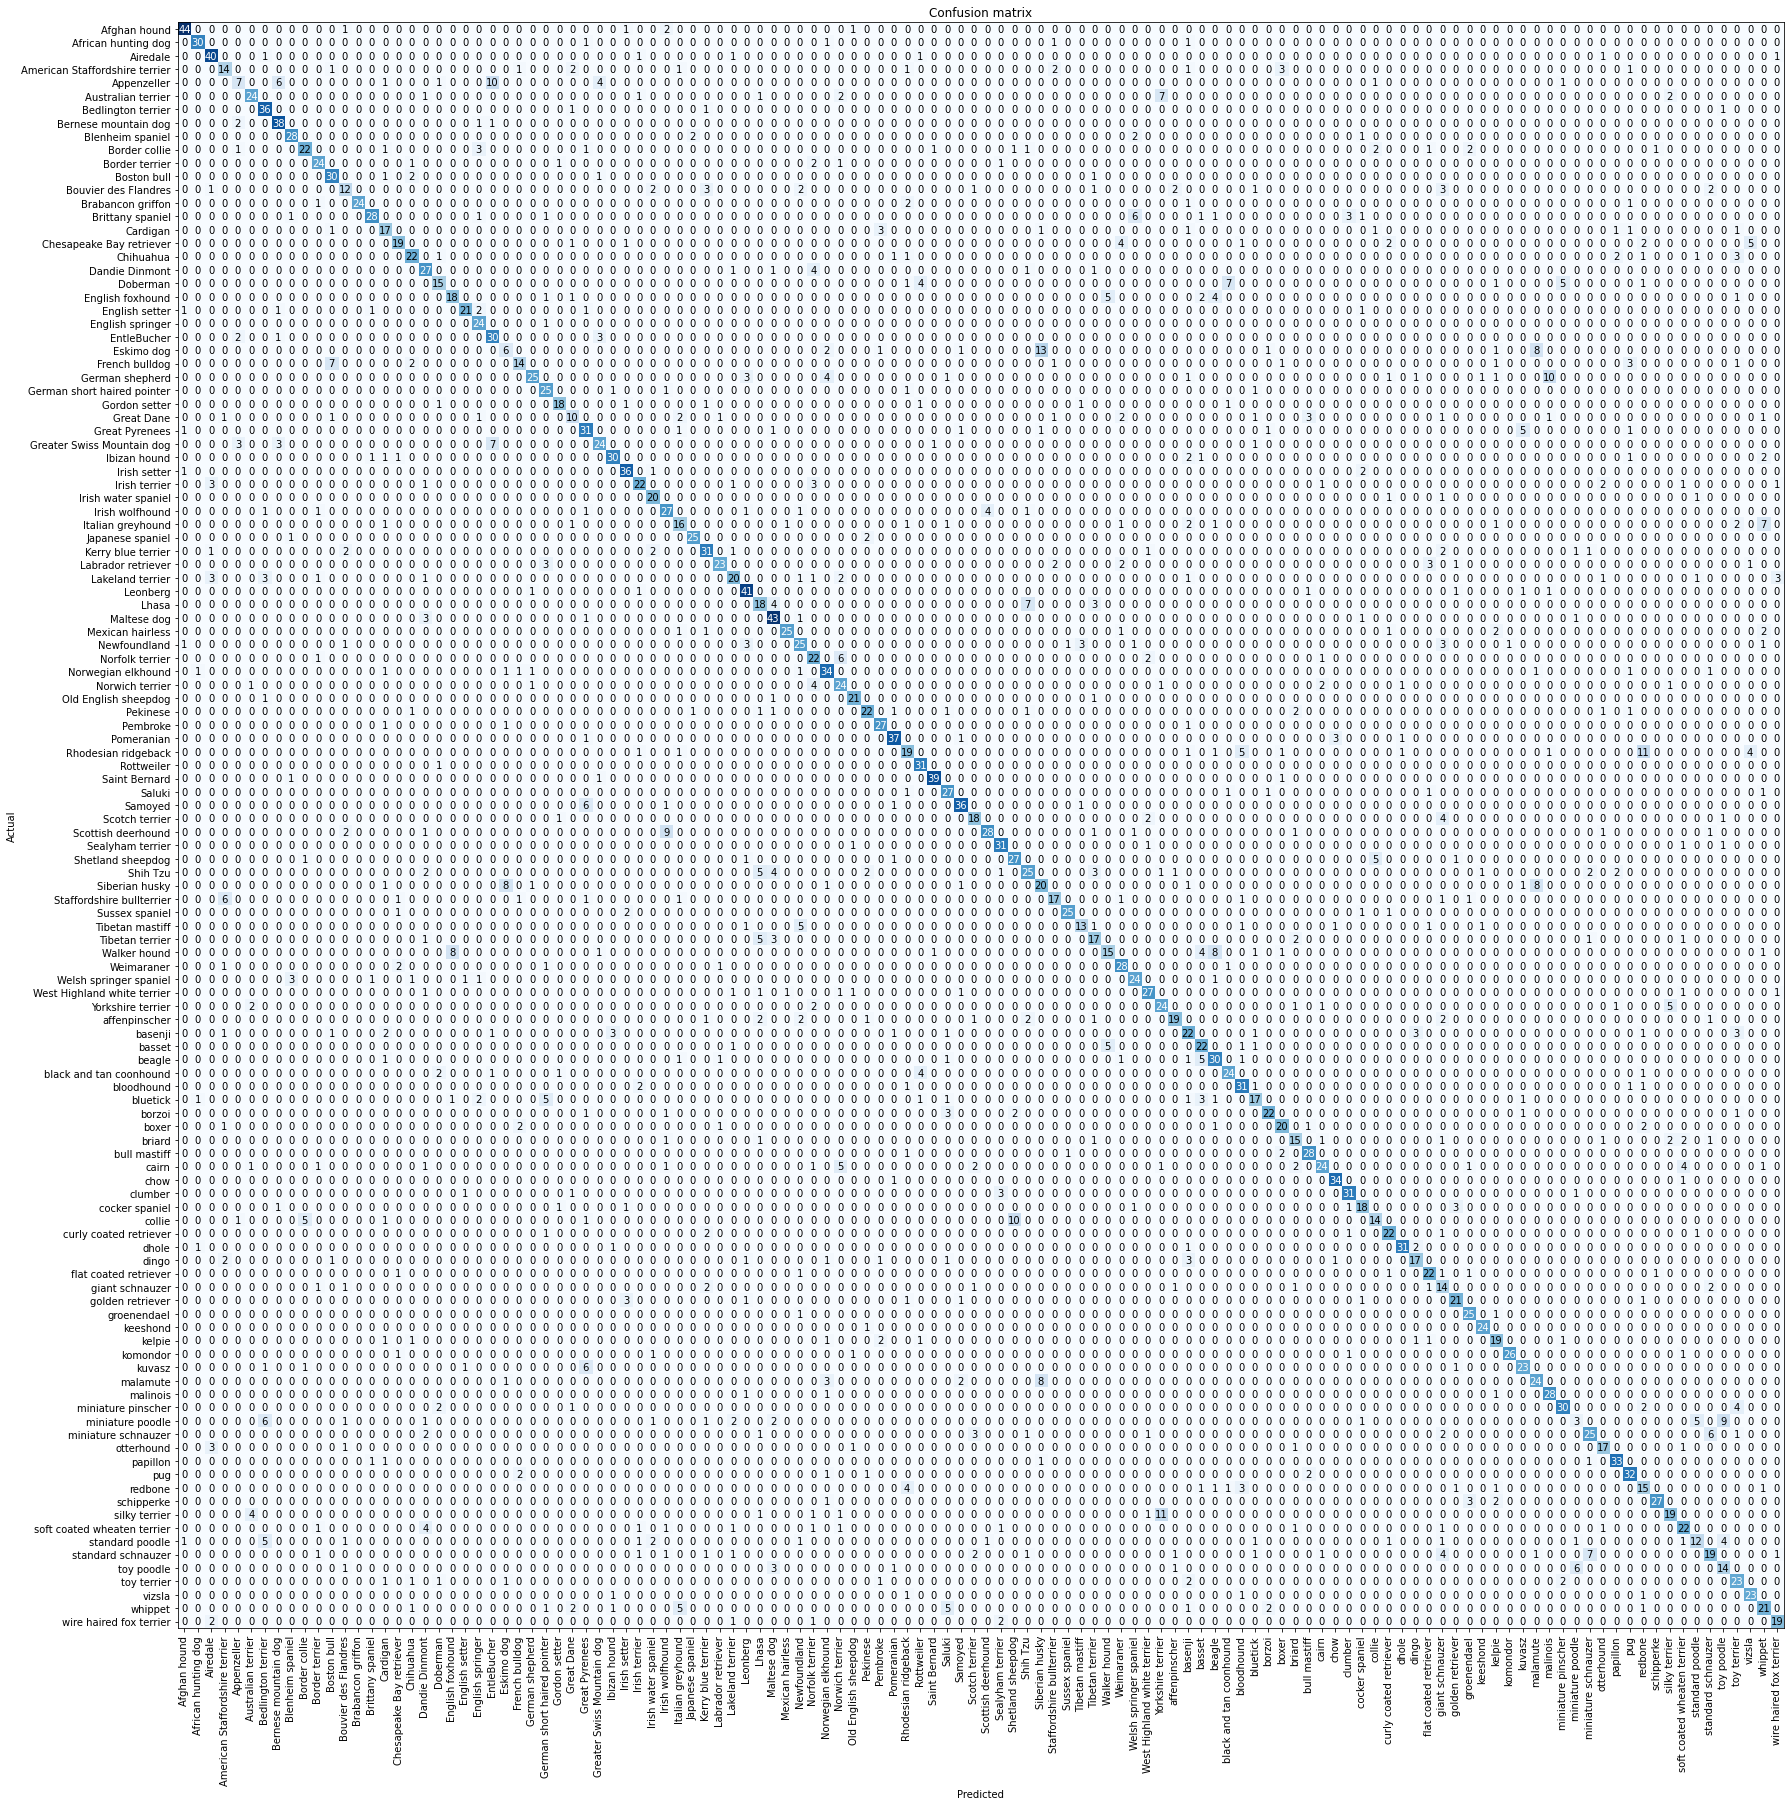

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(25, 25))

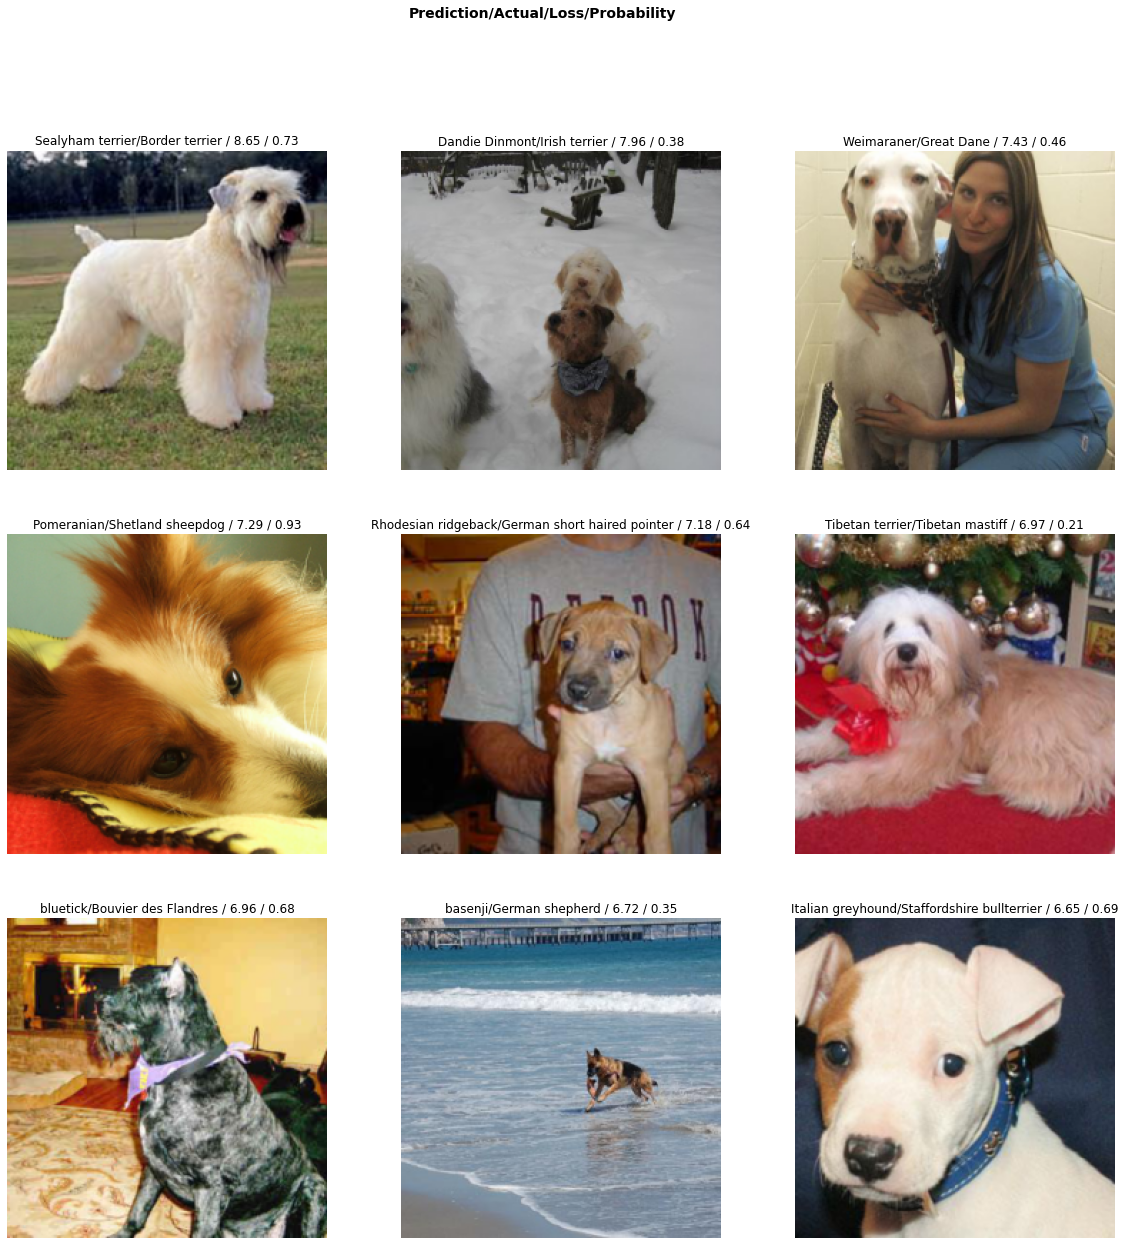

In [ ]:
interp.plot_top_losses(k = 16, figsize=(20,20))